<a href="https://colab.research.google.com/github/priangshu-dey/Lab-Task/blob/main/Lab_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

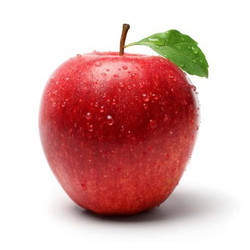

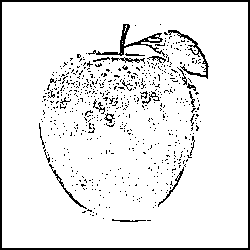

In [2]:
# Task 5

import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def Adaptive_Thresh(Pix_Data, W, H, Win_Size=5, C=10):
    Gray_Img = np.array(Pix_Data[::3]).reshape((H, W))

    Bin_Img = np.zeros((H, W), dtype=np.uint8)

    Radius = Win_Size // 2

    for b in range(Radius, H - Radius):
        for a in range(Radius, W - Radius):
            window = Gray_Img[b - Radius:b + Radius + 1, a - Radius:a + Radius + 1]

            Mean_Inten = np.mean(window)

            Thresh = Mean_Inten - C

            if Gray_Img[b, a] > Thresh:
                Bin_Img[b, a] = 255
            else:
                Bin_Img[b, a] = 0

    binary_data = bytearray()
    for y in range(H):
        for x in range(W):
            binary_data.append(Bin_Img[y, x])
            binary_data.append(Bin_Img[y, x])
            binary_data.append(Bin_Img[y, x])

    return binary_data

image = cv2.imread('/content/sample_data/DIP_Lab_task_05.jpg')
cv2_imshow(image)

Segmented_Img = Adaptive_Thresh(image.flatten(), image.shape[1], image.shape[0])
Segmented_Img = np.array(Segmented_Img).reshape(image.shape)
cv2_imshow(Segmented_Img)